# Predicting Advertisement Clicks Using Logistic Regression
## 📝 Description
This notebook uses the **"Advertisement Click" dataset** to build and evaluate a logistic regression model that predicts whether a user will click on an online advertisement. The dataset contains demographic, geographic, and browsing behavior features such as:

- Daily time spent on site  
- Age  
- Area income  
- Daily internet usage  

### Workflow:
- Data exploration and visualization to identify user behavior patterns  
- Feature preprocessing and encoding using **scikit-learn**  
- Splitting data into training and testing sets  
- Training a **Logistic Regression** model for binary classification  
- Evaluating performance using accuracy, confusion matrix, and classification report  

This project demonstrates how logistic regression can be applied to marketing data to help businesses target ads more effectively.




---

## 📊 Data Loading and Initial Exploration

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


---
## 🔍 Checking for Missing Values
We visualize and inspect the dataset to identify any null or missing entries before proceeding with data preprocessing.


<Axes: >

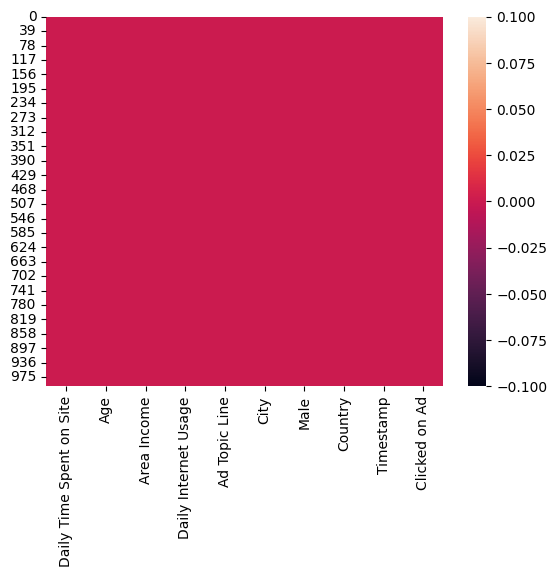

In [ ]:
sns.heatmap(data.isnull())

No NaN found

---

## 🧹 Dropping Irrelevant Features
We remove non-numeric or non-essential columns (`Timestamp`, `Ad Topic Line`, `City`, and `Country`) that do not contribute meaningfully to the prediction task, simplifying the dataset for model training.


In [ ]:
data = data.drop(["Timestamp"],axis = 1)
data = data.drop(["Ad Topic Line"],axis = 1)
data = data.drop(["City"],axis = 1)
data = data.drop(["Country"],axis = 1)

## 📌 Target Variable Analysis
We convert the `Clicked on Ad` column to a categorical type and visualize its distribution to understand the class balance in the dataset.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   int64   
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      1000 non-null   float64 
 4   Male                      1000 non-null   int64   
 5   Clicked on Ad             1000 non-null   category
dtypes: category(1), float64(3), int64(2)
memory usage: 40.3 KB


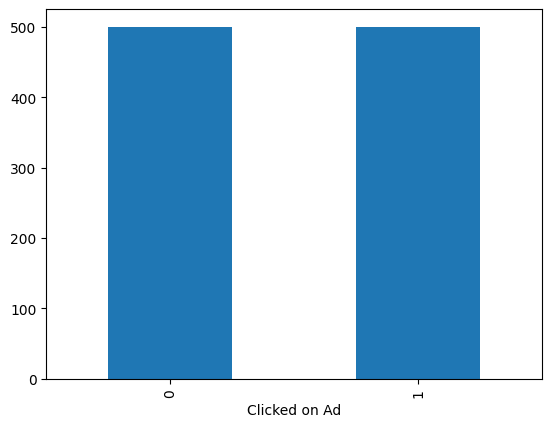

In [ ]:
data["Clicked on Ad"] = data["Clicked on Ad"].astype("category",copy=False)
data["Clicked on Ad"].value_counts().plot(kind="bar")
data.info()

## 🎯 Splitting Features and Target
We separate the dataset into **predictor variables** (`x`) and the **target variable** (`y`) to prepare for model training.


In [ ]:
# Divide the data into target and predictors
y = data["Clicked on Ad"]
x = data.drop(["Clicked on Ad"],axis = 1)

---

## **API** : Skite-learn

## Feature Scaling
We apply **StandardScaler** to normalize the predictor variables, ensuring all features are on the same scale for optimal model performance.




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_sc = scaler.fit_transform(x)

## Train-Test Split
We split the scaled dataset into **training** (70%) and **testing** (30%) sets using a fixed random state for reproducibility.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size = 0.3,random_state =42)

##  Model Training and Prediction
We initialize and train a **Logistic Regression** model using the training dataset, then generate predictions for the test dataset to evaluate how well the model generalizes to unseen data.


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

print("Prediction on training set:", y_pred)

Prediction on training set: [1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0]


## 📊 Model Evaluation
We evaluate the model’s performance using **accuracy score** and **classification report**, which provide insights into metrics such as precision, recall, and F1-score for each class.


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print (f":Accuracy = {accuracy:.2f}")

:Accuracy = 0.97


In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



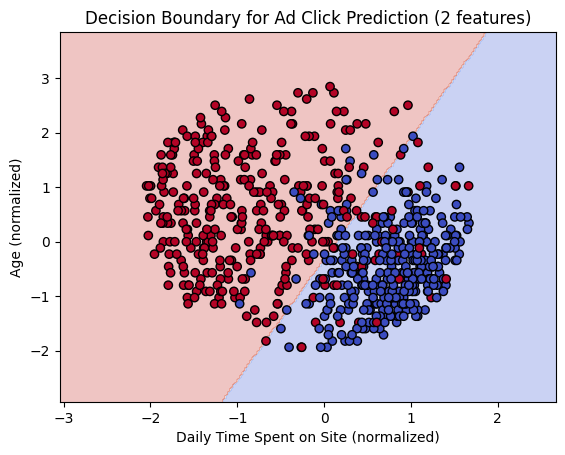

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Select two features (e.g., Daily Time Spent on Site & Age)
feature1 = 0  # Daily Time Spent on Site
feature2 = 1  # Age
X_2d = X_train[:, [feature1, feature2]]  # only 2 features for plotting
y = y_train  # target labels (0 or 1)

# Train logistic regression on just these two features
model_2d = LogisticRegression()
model_2d.fit(X_2d, y)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for the mesh grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Daily Time Spent on Site (normalized)")
plt.ylabel("Age (normalized)")
plt.title("Decision Boundary for Ad Click Prediction (2 features)")
plt.show()
